# Pytorch神经网络构建(二)（13-28节）

## 3. 神经网络与深度学习

### 3.1 Fashion-MNIST 数据集的起源

* 计算机程序一般由两个主要部分组成：代码和数据
* 对于深度学习而言，软件即为网络本身，尤其是在训练过程中通过训练产生的权重
* 神经网络程序员的工作是通过训练来监督和指导学习过程(可以看做是编写软件或代码的间接方式)
#### 3.1.1 Fashion-MNIST数据集
* MNIST是非常著名的手写数字数据集 (M:Modify; NIST: National Institute of Standard and Technology)
* MNIST中共有7万张图像：6万张用于训练；1万张用于测试；共0—9十个类别
* Fashion-MNIST数据集来自Zalando网站：10类别对应10种服饰；7万张 28x28的灰度图像
* Fashion-MNIST的目的是取代MNIST数据集，用作基准来测试机器学习算法
* Fashion-MNIST与MNIST数据集的异同：(1)异：MNIST数据集中图像都是手写图像，而Fashion-MNIST中的是真实图像；(2)同：这两个数据集具有相同的数据规模，图像大小，数据格式，以及训练集和测试集的分割方式
* MNIST为何如此受欢迎：1.该数据集的规模允许深度学习研究者快速地检查和复现它们的算法；2.在所有的深度学习框架中都能使用该数据集
* Pytorch中的torchvision包可以加载fashion-mnist数据集

### 3.2 使用torchvision导入和加载数据集
#### 3.2.1 创建深度学习项目的流程：
1. 准备数据集
2. 创建网络模型
3. 训练网络模型
4. 分析结果
#### 3.2.2 数据准备遵守ETL过程：
* 提取(extract)、转换(transform)、加载(load)
* pytorch中自带的包，能够将ETL过程变得简单
#### 3.2.3 数据的准备：
* 1.提取：从源数据中获取fashion-mnist图像数据
* 2.转换：将数据转换成张量的形式
* 3.加载：将数据封装成对象，使其更容易访问
* * Fashion-MNIST 与 MNIST数据集在调用上最大的不同就是URL的不同
* * torch.utils.data.Dataset:一个用于表示数据集的抽象类
* * torch.utils.data.DataLoader: 包装数据集并提供对底层的访问

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms # 可帮助对数据进行转换

train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',   # 数据集在本地的存储位置
    train = True,                   # 数据集用于训练
    download = True,                # 如果本地没有数据，就自动下载
    transform = transforms.Compose([
        transforms.ToTensor()         
    ])                              # 将图像转换成张量
)

train_loader = torch.utils.data.DataLoader(train_set)
# 训练集被打包或加载到数据加载器中，可以以我们期望的格式来访问基础数据；
# 数据加载器使我们能够访问数据并提供查询功能

### 3.3 数据集的访问

In [2]:
import torch 
import torchvision
import torchvision.transforms as transforms

train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)
# defautlt batch_size=1
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)     # 设置打印行宽
print(len(train_set))
print(train_set.train_labels)
print(train_set.targets)
print(train_set.train_labels.bincount())    # bincount:张量中每个值出现的频数

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


/home/scrutiny/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


* 要想从训练集对象中访问一个单独的元素，首先要将一个训练集对象(train_set)传递给python的iter()函数，以此返回一个表示数据流的对象；然后就可以使用next函数来获取数据流中的元素

In [4]:
# 查看单个样本
sample = next(iter(train_set))
print(len(sample))
print(type(sample))

2
<class 'tuple'>


In [5]:
# 将sample解压成图像和标签
image, label = sample
# image = sample[0]
# label = sample[1]
image.shape
# label.shape

torch.Size([1, 28, 28])

label: 9


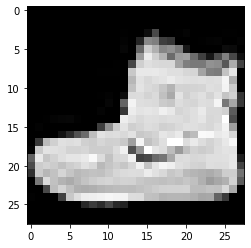

In [6]:
# 显示图像和标签
plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
print('label:', label)

In [7]:
# 查看批量样本
batch= next(iter(train_loader))
print(len(batch))
print(type(batch))
images, labels = batch
print(images.shape)
print(labels.shape)

2
<class 'list'>
torch.Size([10, 1, 28, 28])
torch.Size([10])


torch.Size([3, 32, 302])
labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


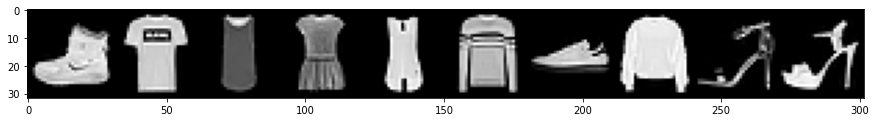

In [8]:
# 画出一批的图像
grid= torchvision.utils.make_grid(images,nrow =10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid,(1,2,0)))   # 将张量转换成矩阵
print('labels:', labels)
# 可以通过改变batchsize来显示更多的数据

#### 3.3.1 不平衡数据集
关于数据不均衡的问题可以读文章：A systematic study of the class imbalance problem in convolutional neural networks

### 3.4 网络建立
#### 3.4.1 class和object的区分
* class 就是一个实际对象的蓝图或描述
* object 就是事物本身
* 创建的对象需要在类的实例中调用对象
* * 一个给定类的所有实例都有两个核心组件：方法和属性
* * 方法代表代码，属性代表数据；方法和属性是由类定义的
* * 属性用于描述对象的特征；方法用于描述对象的行为，即对象能够做什么
* * 在一个项目中可以有许多对象，即给定类的实例可以同时存在（可在一个类中创建多个对象）
* * 类用于封装方法和属性

#### 3.4.2 类和实例(对象)<python基础知识补充>
* 类是抽象的模板，用于表述具有相同属性和方法的对象的集合，类的命名尽量见名知意
* 对象是真实的，见得到摸得着的东西
* 类的定义：class 类名():
* 类的组成：类名；属性（一组数据）；方法（允许进行的操作）

In [9]:
# 类的创建
class Lizard:
    def __init__(self, name):    # 创建对象时自动运行，不用额外调用,无返回值
        self.name = name
    def set_name(self, name):
        self.name = name

In [10]:
# 类的调用
lizard = Lizard('deep')
print(lizard.name)
lizard.set_name('lizard')
print(lizard.name)

deep
lizard


#### 3.4.3 面向对象编程与pytorch的结合
* 构建一个神经网络的主要组件是层（pytorch神经网络库中包含了帮助构造层的类）
* 神经网络中的每一层都有两个主要组成部分：转换和权重（转换代表代码；权重代表数据）
* forward方法（前向传输）：张量通过每层的变换向前流动，直到达到输出层
* 构建神经网络时必须提供前向方法，前向方法即为实际的变换
* 使用pytorch创建神经网络的步骤：
* 1.扩展nn.Module基类
* 2.定义层(layers)为类属性
* 3.实现前向方法

In [11]:
# CNN网络的建立
import torch.nn as nn
class Network(nn.Module):   #()中加入nn.Module可以使得Network类继承Module基类中的所有功能
    def __init__(self):
        super(Network, self).__init__()     # 对继承的父类的属性进行初始化，使用父类的方法来进行初始化
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)        # 从卷积层传入线性层需要对张量flatten
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self, t):
        # implement the forward pass
        return t

In [12]:
network = Network()     # 创建网络对象network
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

### 3.5 CNN构建及网络参数的使用
在上述的Network类中，我们定义了两个卷积层和一个线性层；两个主要的部分封装在其中，即前向函数的定义和权重张量；每个层中权重张量包含了随着我们的网络在训练过程中学习而更新的权重值（这就是在网络类中将层定义为类属性的原因）；在Module类中，pytorch可以跟踪每一层的权重张量，由于我们在创建Network类时扩展了Module类，也就自动继承了该功能。
* Parameter和Argument的区别：
* * Parameter在函数定义中使用，可将其看作是占位符；(形参)
* * Argument是当函数被调用时传递给函数的实际值；（实参）
* Parameter的两种类型：
* 1.Hyperparameters:其值是手动和任意确定的；要构建神经网络：kernel_size, out_channels, out_features都需要手动选择
* 2.Data dependent Hyperparameters:其值是依赖于数据的参数
* * 该参数位于网络的开始或末端，即第一个卷积层的输入通道和最后一个卷积层的输出特征图
* * 第一个卷积层的输入通道依赖于构成训练集的图像内部的彩色通道的数量（灰度图像是1，彩色图像是3）
* * 输出层的输出特征依赖于训练集中类的数量（fashion-MNIST数据集中的类型为10，则输出层的out_features=10）
* * 通常情况下，一层的输入是上一层的输出（即：卷积层中所有输入通道和线性层中的输入特征都依赖于上一层的数据）
* 当张量从卷积层传入线性层时，张量必须是flatten的

|     Parameter     |     Description      |
|:----------------------|:-------------------------|
|kernel_size| 设置滤波器的大小；滤波器的数量就是输出通道数|
|out_channels| 设置滤波器的数量，即为输出通道数|
|out_features| 设置输出张量的大小|

### 3.6 CNN的权重
* 可学习参数：是在训练过程中学习的参数，初值是选择的任意值，其值在网络学习的过程中以迭代的方式进行更新
* 说网络在学习是指：网络在学习参数的适合的值，适合的值就是能使损失函数最小化的值
* 可学习的参数是网络的权重，存在于每一层中
* 当我们扩展类的时候，我们会得到它的所有功能，为了得到它，我们可以添加额外的功能，也可覆盖现有的功能
* 在python中，所有特殊的面向对象的方法通常都有前双下划线和后双下划线（__init__, __repr__）

In [13]:
# Network类没有扩展Module基类
import torch.nn as nn
class Network():
    def __init__(self):
        #super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # implement the forward pass
        return t

In [14]:
network = Network()
network

* 如下所示，在未扩展module时，可使用__repr__函数实现正常输出

In [15]:
import torch.nn as nn
class Network():
    def __init__(self):
        #super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # implement the forward pass
        return t
    def __repr__(self):
        return "lizard"

In [16]:
network = Network()
network

lizard

* 可使用点符号来访问指定的层

In [17]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [18]:
# 输出conv1的权重
network.conv1.weight

Parameter containing:
tensor([[[[ 0.1550, -0.1967,  0.0051,  0.1364, -0.1004],
          [-0.0348,  0.1581, -0.0968,  0.0706, -0.0262],
          [ 0.1209, -0.1307,  0.0147, -0.1079,  0.1350],
          [ 0.0828, -0.1987,  0.0998,  0.0502,  0.0674],
          [ 0.0078,  0.0604, -0.1605,  0.1366, -0.0363]]],


        [[[ 0.1380, -0.0283, -0.1985, -0.1415,  0.0631],
          [-0.1448,  0.0573, -0.0085, -0.1246,  0.1365],
          [-0.1175, -0.1469, -0.0815,  0.1771, -0.0687],
          [-0.0574,  0.1875, -0.0825, -0.1704, -0.0638],
          [ 0.1323, -0.0415, -0.1018,  0.1031, -0.0696]]],


        [[[ 0.1267,  0.0601, -0.0650,  0.1642, -0.0682],
          [ 0.0142, -0.1832,  0.1301,  0.0342,  0.1481],
          [-0.1737, -0.0392,  0.0063,  0.1013,  0.0383],
          [ 0.0899,  0.1853, -0.0831, -0.0142,  0.1534],
          [ 0.0019, -0.1703,  0.0796, -0.0143, -0.0874]]],


        [[[-0.1380,  0.1161, -0.1240,  0.1348, -0.1203],
          [ 0.0921, -0.0338, -0.0224,  0.0363,  0.1302

In [19]:
# 输出conv1权重的形状
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [20]:
# 对于全连接层，由于需要flatten的张量输入，故此时的权重张量是个秩为2的高度、宽度轴
network.fc1.weight.shape   # height=>out_features; width=>in_features

torch.Size([120, 192])

* 为了追踪网络中的所有权重张量，pytorch有一个叫Parameter的类，该类扩展了Tensor类， 所以每一层的权重张量就是这个参数类的一个实例
* 权重矩阵定义了线性函数(线性映射)

In [21]:
# 张量的乘法
in_features = torch.tensor([1,2,3,4],dtype=torch.float32)
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)
weight_matrix.matmul(in_features)     # matmul: matrix multiply

tensor([30., 40., 50.])

In [22]:
# CNN网络的建立
import torch.nn as nn
class Network(nn.Module):   #()中加入nn.Module可以使得Network类继承Module基类中的所有功能
    def __init__(self):
        super(Network, self).__init__()     # 对继承的父类的属性进行初始化，使用父类的方法来进行初始化
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)        # 从卷积层传入线性层需要对张量flatten
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self, t):
        # implement the forward pass
        return t

In [23]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [24]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [25]:
# 访问所有的参数
# 方法1：
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [26]:
# 方法2： 
for name, param in network.named_parameters():
    print(name,'\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


### 3.7 pytorch可调用模块
#### 3.7.1 Linear的工作原理

In [27]:
# 1. 张量的乘法
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype = torch.float32)
weight_matrix.matmul(in_features)
# 可将上述的权重矩阵看作是一个线性映射（函数），其实现过程与pytorch中的线性层一样

tensor([30., 40., 50.])

In [28]:
# 2. 线性层
fc = nn.Linear(in_features=4, out_features=3)
# pytorch 线性层通过将数字4和3传递给构造函数，以创建一个3x4的权重矩阵
# 查看in_features张量
fc(in_features)
# 此时的结果与上述不同是因为这里的weight_matrix是由随机值来初始化的

tensor([-2.7737, -1.3963,  1.2580], grad_fn=<AddBackward0>)

In [29]:
# 在parameter类中包装一个权重矩阵，以使得输出结果与1中一样
fc = nn.Linear(in_features=4, out_features=3)
fc.weight= nn.Parameter(weight_matrix)
fc(in_features)
# 此时的结果接近1中的结果却不精确，是因为由bias的存在

tensor([29.8975, 40.3674, 49.7329], grad_fn=<AddBackward0>)

In [30]:
print(fc.weight)

Parameter containing:
tensor([[1., 2., 3., 4.],
        [2., 3., 4., 5.],
        [3., 4., 5., 6.]], requires_grad=True)


In [31]:
# 给bias传递一个false值，以得到精确的输出
fc = nn.Linear(in_features=4, out_features=3, bias =False)
fc.weight = nn.Parameter(weight_matrix)
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

* 线性转换的数学表示：
* y = Ax + b
* A: 权重矩阵张量
* x: 输入张量
* b: 权重张量
* y: 输出张量

#### 3.7.2 特殊的调用


### 3.8 CNN前向方法的实现
* 前向方法的实现将使用我们在构造函数中定义的所有层
* 前向方法实际上是输入张量到预测的输出张量的映射
* call中调用forward()
#### 3.8.1 Input Layer
* 输入层是由输入数据决定的
* 输入层可以看做是恒等变换 f(x)=x
* 输入层通常是隐式存在的

In [32]:
import torch.nn as nn
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # (1) input layer
        t = t
        # (2) hidden conv layer1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (3) hidden conv layer2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # relu 和 max pooling 都没有权重；激活层和池化层的本质都是操作而非层；层与操作的不同之处在于，层有权重，操作没有
        #（4）hidden linear layer2
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        # (5) hidden linear layer2
        t = self.fc2(t)
        t = F.relu(t)
        # (6) output layer
        t = self.out(t)
        # t= F.softmax(t, dim=1)  # 这里暂不使用softmax，在训练中使用交叉熵损失可隐式的表示softmax
        # 在隐藏层中，通常使用relu作为非线性激活函数
        # 在输出层，有类别要预测时，使用
        

### 3.9 单张图像的预测
#### 3.9.1 前向传播(forward propagation)
* 是将输入张量转换为输出张量的过程（即：神经网络是将输入张量映射到输出张量的函数）
* 前向传播只是将输入张量传递给网络并从网络接收输出的过程的一个特殊名称
#### 3.9.2 反向传播(back propagation)
* 反向传播通常在前向传播后发生
* 使用torch.set_grad_enabled(False)来关闭pytorch的梯度计算，这将阻止pytorch在我们的张量通过网络时构建一个计算图
* 计算图通过跟踪张量在网络中传播的每一个计算，来跟踪网络的映射；然后在训练过程中使用这个图来计算导数，也就是损失函数的梯度；关闭并非强制的，但可以减少内存。

In [33]:
# 单张图像预测
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# 设置打印格式
torch.set_printoptions(linewidth=120)

# 一、数据准备
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    , transform = transforms.Compose([
        transforms.ToTensor()
    ])
)
# 二、创建网络
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features=10)
    def forward(self, t):
        # （1）Input Layer
        t = t
        # (2) hidden conv1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (3) hidden conv2 
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (4) hidden linear1
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        # (5) hidden linear2
        t = self.fc2(t)
        t = F.relu(t)
        # (6) output
        t = self.out(t)
        return t
        
# 调用network实例
torch.set_grad_enabled(False)    #关闭pytorch的梯度计算
network = Network()
sample = next(iter(train_set))
image, label = sample
print(image.shape)
# 显示图像和标签
#plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
#print('label:', label)
# 如上我们得到的图像的形状为[1,28,28];而网络期望的张量是【batchsize,channels, height, width】
# 需要使用unsqueeze方法来为其增加一个维度
print(image.unsqueeze(0).shape)
# 对单张图像进行预测
pred = network(image.unsqueeze(0))
print(pred.shape)
print(pred.argmax(dim=1))
print(label)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 10])
tensor([2])
9


In [34]:
# 要想将预测值用概率表示，可以使用softmax
print(F.softmax(pred, dim=1))
print(F.softmax(pred, dim=1).sum())

tensor([[0.1017, 0.0955, 0.1135, 0.0911, 0.1035, 0.0894, 0.1102, 0.1040, 0.0986, 0.0926]])
tensor(1.)


### 3.10 单批次图像预测

In [35]:
import torch
import torch.nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)

print(torch.__version__)
# print(torchvision.__version__)

1.2.0+cu92


In [36]:
# 数据准备
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ]))

In [37]:
# 网络创建
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self, t):
        #super(Network, self).__init__()
        #(1)Input Layer
        t = t
        #(2)Conv1
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #(3)Conv2
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #(4)FC1
        t = t.reshape(-1,12*4*4)
        t = F.relu(self.fc1(t))
        #(5)FC2
        t = F.relu(self.fc2(t))
        #(6)output
        t = self.out(t)
        return t

In [38]:
# 调用network实例
torch.set_grad_enabled(False)
network = Network()
# 从dataloader中取出一批数据
data_loader  = torch.utils.data.DataLoader(train_set, batch_size=10)
batch = next(iter(data_loader))
images, labels = batch
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [39]:
pred = network(images)
print(pred.shape)
print(pred)

torch.Size([10, 10])
tensor([[ 1.2919e-01,  3.1965e-02, -7.7001e-03,  3.0372e-02, -6.7599e-02,  1.3760e-01,  1.8903e-03,  6.2647e-02,
         -6.8753e-02, -6.4688e-02],
        [ 1.2190e-01,  2.5585e-02, -6.8687e-03,  3.4240e-02, -7.0289e-02,  1.3624e-01,  4.5368e-03,  5.8238e-02,
         -7.5559e-02, -6.6057e-02],
        [ 1.3091e-01,  2.1538e-02,  3.6443e-03,  2.5664e-02, -6.2841e-02,  1.3358e-01, -2.6303e-04,  6.0917e-02,
         -7.1316e-02, -7.5390e-02],
        [ 1.2891e-01,  2.6405e-02,  1.3432e-03,  2.7608e-02, -6.2648e-02,  1.3362e-01,  7.3556e-05,  6.5516e-02,
         -7.1202e-02, -7.1796e-02],
        [ 1.3415e-01,  2.0246e-02, -6.0820e-03,  3.4991e-02, -5.9770e-02,  1.3277e-01, -7.7990e-03,  6.7674e-02,
         -7.2181e-02, -7.2677e-02],
        [ 1.2719e-01,  2.6591e-02, -9.3964e-03,  3.1549e-02, -6.9746e-02,  1.3794e-01,  1.9912e-03,  5.9636e-02,
         -7.2292e-02, -6.5043e-02],
        [ 1.2827e-01,  3.1095e-02, -6.7266e-03,  2.4865e-02, -6.7947e-02,  1.3469e-01

In [40]:
print(pred.argmax(dim=1))
print(labels)

tensor([5, 5, 5, 5, 0, 5, 5, 5, 5, 5])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [41]:
print(F.softmax(pred, dim=1))
print(F.softmax(pred,dim=1).sum())

tensor([[0.1114, 0.1011, 0.0972, 0.1009, 0.0915, 0.1124, 0.0981, 0.1042, 0.0914, 0.0918],
        [0.1109, 0.1007, 0.0975, 0.1016, 0.0915, 0.1125, 0.0986, 0.1040, 0.0910, 0.0919],
        [0.1118, 0.1002, 0.0985, 0.1006, 0.0921, 0.1121, 0.0981, 0.1043, 0.0913, 0.0910],
        [0.1115, 0.1006, 0.0981, 0.1007, 0.0920, 0.1120, 0.0980, 0.1046, 0.0913, 0.0912],
        [0.1121, 0.1000, 0.0974, 0.1015, 0.0924, 0.1120, 0.0973, 0.1049, 0.0912, 0.0912],
        [0.1114, 0.1007, 0.0972, 0.1012, 0.0915, 0.1126, 0.0983, 0.1041, 0.0912, 0.0919],
        [0.1116, 0.1012, 0.0975, 0.1006, 0.0917, 0.1123, 0.0978, 0.1040, 0.0912, 0.0921],
        [0.1110, 0.1009, 0.0970, 0.1009, 0.0916, 0.1125, 0.0984, 0.1046, 0.0916, 0.0916],
        [0.1108, 0.1004, 0.0977, 0.1007, 0.0914, 0.1125, 0.0989, 0.1050, 0.0914, 0.0912],
        [0.1116, 0.1009, 0.0969, 0.1006, 0.0917, 0.1123, 0.0979, 0.1050, 0.0916, 0.0914]])
tensor(10.0000)


In [42]:
def get_num_correct(pred, labels):
    return pred.argmax(dim=1).eq(labels).sum().item()

In [43]:
get_num_correct(pred, labels)

3

### 3.11 输入张量在通过CNN的过程中的变化
#### 3.11.1 CNN 输出特征图尺寸(正方形)
* 假设输入特征的大小为n x n
* 假设滤波器的大小为 f x f
* 令padding为p，步长stride为s
* 则输出特征图的大小为 O = ( n - f + 2p )/s + 1
#### 3.11.2 CNN 输出特征图尺寸(非正方形)
* 假设输入特征的大小为 nh x nw
* 假设滤波器的大小为 fh x fw
* 令padding为p，步长stride为s
* 则输出特征图的高度为 Oh = (nh - fh + 2p)/s + 1
* 输出特征图的宽度为 Ow = (nw - fw + 2p)/s + 1

### 3.12 训练神经网络的步骤
#### 3.12.1 训练神经网络的七个步骤
* 从训练集中获取批量数据
* 将批量数据传入网络
* 计算损失(预测值与真实值之间的差)【需要loss function实现】
* 计算损失函数的梯度  【需要back propagation实现】
* 通过上一步计算的梯度来更新权重，进而减少损失【需要optimization algorithm实现】
* 重复1-5步直到一个epoch执行完成
* 重复1-6步直到所设定的epochs执行完成并得到满意的accuracy
#### 3.12.2 单批次图像训练

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)  # 这里并不是必须的，默认情况下是打开的

print(torch.__version__)
# print(torchvision.__version__)

1.2.0+cu92


In [45]:
# 一、训练数据获取
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    )

In [46]:
# 二、创建网络
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, t):
        # Input Layer
        t = t
        # Conv1
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # Conv2
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # FC1
        t = t.reshape(-1, 12*4*4)
        t = F.relu(self.fc1(t))
        # FC2
        t = F.relu(self.fc2(t))
        # Output
        t = self.out(t)
        return t

In [47]:
# 调用network实例
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch
# 计算损失
preds = network(images)
loss = F.cross_entropy(preds,labels)
loss.item()   #获得损失的值

2.3001296520233154

In [48]:
print(network.conv1.weight.grad)

None


In [49]:
# 计算损失的梯度
loss.backward()      #反向传播

In [50]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [51]:
# 更新权重
optimizer = optim.Adam(network.parameters(), lr =0.01)
loss.item()      # 显示当前loss值

2.3001296520233154

In [52]:
# 定义函数用于计算预测正确的数目
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
print(get_num_correct(preds, labels))
# 更新权重
optimizer.step()

11


In [53]:
preds = network(images)
loss = F.cross_entropy(preds,labels)
print(loss.item())
print(get_num_correct(preds, labels))

2.2804784774780273
15


#### 3.12.3 单批次网络训练步骤总结
* 从训练集中获取批量数据（lr为学习率:即朝着loss最小的方向走多远）

In [54]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)
batch = next(iter(train_loader))

* 将批量数据传入network

In [55]:
preds = network(images)

* 计算loss

In [56]:
loss = F.cross_entropy(preds, labels)

* 计算loss的梯度

In [57]:
loss.backward()

* 使用计算出的梯度来更新权重，从而减少loss

In [58]:
optimizer.step()
print('loss1:',loss.item())  #更新前的loss
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:',loss.item())

loss1: 2.307161808013916
loss2: 2.283153772354126


### 3.13 单周期(epoch)CNN的训练

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

print(torch.__version__)
# print(torchvision.__version__)

1.2.0+cu92


In [60]:
# 数据准备
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()
                                   ]))

In [61]:
# 创建网络
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features= 12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features= 120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, t):
        t = t
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size =2, stride=2)
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        t = t.reshape(-1, 12*4*4)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        return t
        

In [62]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [63]:
# 创建网络实例
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
for epoch in range(2):
    total_loss = 0
    total_correct = 0
    for batch in train_loader:   # Get batch
        images, labels =batch
        preds = network(images)
        loss = F.cross_entropy(preds, labels)
        optimizer.zero_grad()  #告诉优化器把梯度属性中权重的梯度归零，否则pytorch会累积梯度
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
    print("epoch:",epoch,"loss:",total_loss,"total_correct:",total_correct)

epoch: 0 loss: 345.69958394765854 total_correct: 46885
epoch: 1 loss: 238.48316836357117 total_correct: 51220


In [64]:
accuracy = total_correct/len(train_set)
print("accuracy:",accuracy)

accuracy: 0.8536666666666667


* 每个周期的迭代数 = 数据总数/batchsize（当改变batchsize时，也就是改变了更新权重的次数，也就是朝损失函数最小的防线前进的步数）
* accuracy = total_correct/len(train_set)
* 梯度：告诉我们应该走哪条路能更快的到达loss最小

### 3.14 神经网络的混淆矩阵
* 创建混淆矩阵的两个条件:一个预测的张量和一个有相应真值或标签的张量

In [65]:
# 在3.13训练后网络的基础上进行分析
len(train_set)

60000

In [66]:
len(train_set.targets)

60000

对整个训练集进行预测

In [67]:
# 另一种方式
# @torch.no_grad()
def get_all_preds(model,loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images,labels = batch
        preds = model(images)
        all_preds = torch.cat((all_preds,preds), dim=0)
    return all_preds

In [68]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
train_preds = get_all_preds(network, prediction_loader)

In [69]:
train_preds.shape

torch.Size([60000, 10])

In [70]:
print(train_preds.requires_grad)   #查看训练预测张量的梯度属性

True


In [71]:
train_preds.grad
# 即使训练中关于梯度张量的跟踪已打开，但在没有进行反向传播的情况下依旧不会有梯度的值

In [72]:
train_preds.grad_fn   # 由于train_preds是经过函数产生的，故具有该属性

In [73]:
# 局部关闭梯度跟踪以减小内存损耗,也可使用torch.set.grad.enabled(False)进行全局关闭
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=1000)
    train_preds = get_all_preds(network, prediction_loader)

In [74]:
len(train_preds)

60000

In [75]:
print(train_preds.requires_grad)

False


In [76]:
train_preds.grad

In [77]:
train_preds.grad_fn

In [78]:
preds_correct = get_num_correct(train_preds, train_set.targets)
print("total_correct:",preds_correct)
print("accuracy:",preds_correct/len(train_set))

total_correct: 51360
accuracy: 0.856


绘制混淆矩阵(方法1：)

In [79]:
print(train_set.targets)
print(train_set.targets.shape)

tensor([9, 0, 0,  ..., 3, 0, 5])
torch.Size([60000])


In [80]:
print(train_preds.argmax(dim=1))
print(train_preds.argmax(dim=1).shape)

tensor([9, 0, 0,  ..., 3, 0, 5])
torch.Size([60000])


In [81]:
stack = torch.stack(
    (
        train_set.targets, 
        train_preds.argmax(dim=1)
    ),dim=1
)
stack

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [82]:
stack.shape

torch.Size([60000, 2])

In [83]:
# 使用tolist方法可访问【target，pred】对
stack[0].tolist()

[9, 9]

In [84]:
# 创建一个混淆矩阵(初始)
cmt = torch.zeros(10,10,dtype=torch.int32)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [85]:
# 遍历所有的对，并计算每个组合发生的次数
for p in stack:
    tl,pl = p.tolist()
    cmt[tl,pl] = cmt[tl,pl] + 1

In [86]:
cmt

tensor([[5472,   33,   42,  113,   16,    1,  254,    0,   69,    0],
        [  21, 5898,    1,   54,   10,    1,    6,    0,    9,    0],
        [ 153,    7, 3780,   53, 1251,    0,  721,    0,   35,    0],
        [ 286,   96,    9, 5297,  170,    3,  131,    0,    8,    0],
        [  29,   20,  151,  256, 4873,    0,  642,    0,   28,    1],
        [  10,    0,    1,    1,    0, 5520,    0,  304,   69,   95],
        [1618,   26,  419,  109,  523,    1, 3216,    0,   88,    0],
        [   0,    0,    0,    0,    1,   26,    0, 5856,   20,   97],
        [  32,    5,   22,   25,   17,    9,   36,    5, 5849,    0],
        [   0,    0,    0,    1,    0,   14,    1,  378,    7, 5599]], dtype=torch.int32)

Confusion matrix, without normalization
tensor([[5472,   33,   42,  113,   16,    1,  254,    0,   69,    0],
        [  21, 5898,    1,   54,   10,    1,    6,    0,    9,    0],
        [ 153,    7, 3780,   53, 1251,    0,  721,    0,   35,    0],
        [ 286,   96,    9, 5297,  170,    3,  131,    0,    8,    0],
        [  29,   20,  151,  256, 4873,    0,  642,    0,   28,    1],
        [  10,    0,    1,    1,    0, 5520,    0,  304,   69,   95],
        [1618,   26,  419,  109,  523,    1, 3216,    0,   88,    0],
        [   0,    0,    0,    0,    1,   26,    0, 5856,   20,   97],
        [  32,    5,   22,   25,   17,    9,   36,    5, 5849,    0],
        [   0,    0,    0,    1,    0,   14,    1,  378,    7, 5599]], dtype=torch.int32)


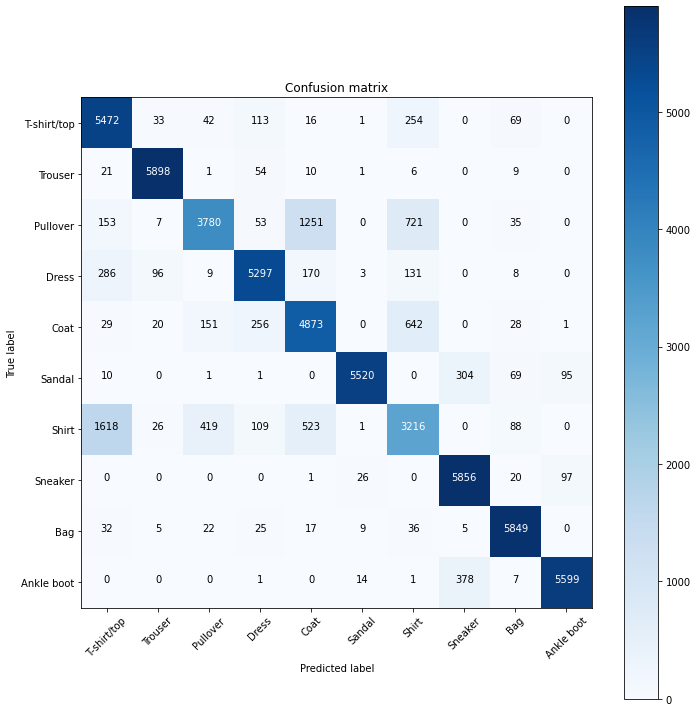

In [87]:
import matplotlib.pyplot as plt
from resources.plotcm import plot_confusion_matrix
names = (
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cmt, names)

绘制混淆矩阵(方法2：)

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from resources.plotcm import plot_confusion_matrix  # plotcm.py文件位于当前文件resources中

cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
cm

array([[5472,   33,   42,  113,   16,    1,  254,    0,   69,    0],
       [  21, 5898,    1,   54,   10,    1,    6,    0,    9,    0],
       [ 153,    7, 3780,   53, 1251,    0,  721,    0,   35,    0],
       [ 286,   96,    9, 5297,  170,    3,  131,    0,    8,    0],
       [  29,   20,  151,  256, 4873,    0,  642,    0,   28,    1],
       [  10,    0,    1,    1,    0, 5520,    0,  304,   69,   95],
       [1618,   26,  419,  109,  523,    1, 3216,    0,   88,    0],
       [   0,    0,    0,    0,    1,   26,    0, 5856,   20,   97],
       [  32,    5,   22,   25,   17,    9,   36,    5, 5849,    0],
       [   0,    0,    0,    1,    0,   14,    1,  378,    7, 5599]])

Confusion matrix, without normalization
[[5472   33   42  113   16    1  254    0   69    0]
 [  21 5898    1   54   10    1    6    0    9    0]
 [ 153    7 3780   53 1251    0  721    0   35    0]
 [ 286   96    9 5297  170    3  131    0    8    0]
 [  29   20  151  256 4873    0  642    0   28    1]
 [  10    0    1    1    0 5520    0  304   69   95]
 [1618   26  419  109  523    1 3216    0   88    0]
 [   0    0    0    0    1   26    0 5856   20   97]
 [  32    5   22   25   17    9   36    5 5849    0]
 [   0    0    0    1    0   14    1  378    7 5599]]


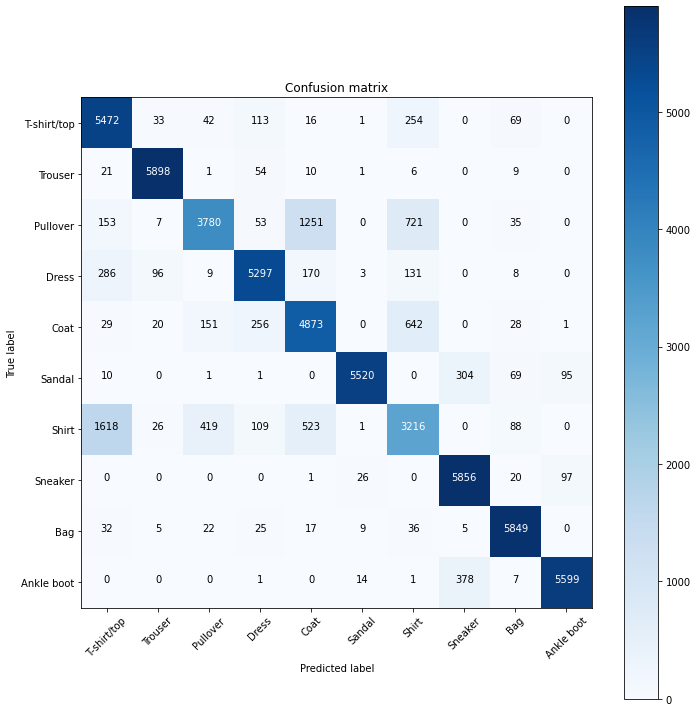

In [89]:
names = (
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)

### 3.15 concatenating和stacking的区分
* concatenating是在一个现有的轴上连接一系列的张量
* stacking是在一个新的轴上连接一系列的张量(即，我们在所有的张量中创建一个新轴)

In [90]:
# 给张量创建新轴
import torch
t = torch.tensor([1,1,1]) 
print(t.unsqueeze(dim=0))
print(t.unsqueeze(dim=0).shape)
print(t.unsqueeze(dim=1))
print(t.unsqueeze(dim=1).shape)

tensor([[1, 1, 1]])
torch.Size([1, 3])
tensor([[1],
        [1],
        [1]])
torch.Size([3, 1])


In [93]:
# 使用Pytorch实现concatenating和stacking
t1 = torch.tensor([1,1,1])
t2 = torch.tensor([2,2,2])
t3 = torch.tensor([3,3,3])
# Concatenating
t_cat = torch.cat((t1,t2,t3), dim=0)
print(t_cat)

# Stacking
t_stack = torch.stack((t1, t2, t3), dim=0)
print(t_stack)

# Staking相当于先给张量添加一个新轴然后在concat
t_stack1 = torch.cat((t1.unsqueeze(0),t2.unsqueeze(0),t3.unsqueeze(0)), dim =0)
print(t_stack1)

t_stack2 = torch.cat((t1.unsqueeze(1),t2.unsqueeze(1),t3.unsqueeze(1)), dim =1)
print(t_stack2)
# cat不增加维度，stack增加维度

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])
tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])
tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])


In [97]:
# 使用Tensorflow实现concatenating和stacking
import tensorflow as tf
# Concatenating
t1 = tf.constant([1,1,1])
t2 = tf.constant([2,2,2])
t3 = tf.constant([3,3,3])
t_cat = tf.concat((t1, t2, t3), axis =0)
print(t_cat)

#Stacking
t_stack = tf.stack((t1, t2, t3), axis =0)
print(t_stack)

Tensor("concat_3:0", shape=(9,), dtype=int32)
Tensor("stack_1:0", shape=(3, 3), dtype=int32)


In [99]:
tf.concat(
    (
        tf.expand_dims(t1, 0)
        ,tf.expand_dims(t2, 0)
        ,tf.expand_dims(t3, 0)
    )
    ,axis=0
)

<tf.Tensor 'concat_5:0' shape=(3, 3) dtype=int32>

In [100]:
tf.concat(
    (
        tf.expand_dims(t1, 1)
        ,tf.expand_dims(t2, 1)
        ,tf.expand_dims(t3, 1)
    )
    ,axis=1
)

<tf.Tensor 'concat_6:0' shape=(3, 3) dtype=int32>

In [101]:
# 使用Numpy实现concatenating和stacking
import numpy as np
t1 = np.array([1,1,1])
t2 = np.array([2,2,2])
t3 = np.array([3,3,3])
# Concatenating
t_cat = np.concatenate((t1,t2,t3), axis=0)
print(t_cat)
# Stacking
t_stack = np.stack((t1,t2,t3), axis =0)
print(t_stack)

[1 1 1 2 2 2 3 3 3]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [103]:
np.concatenate(
    (
        np.expand_dims(t1, 0)
        ,np.expand_dims(t2, 0)
        ,np.expand_dims(t3, 0)
    )
    ,axis=0
)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [104]:
np.concatenate(
    (
        np.expand_dims(t1, 1)
        ,np.expand_dims(t2, 1)
        ,np.expand_dims(t3, 1)
    )
    ,axis=1
)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])